# **Question 7**

Saving A4_P1.csv to A4_P1 (1).csv


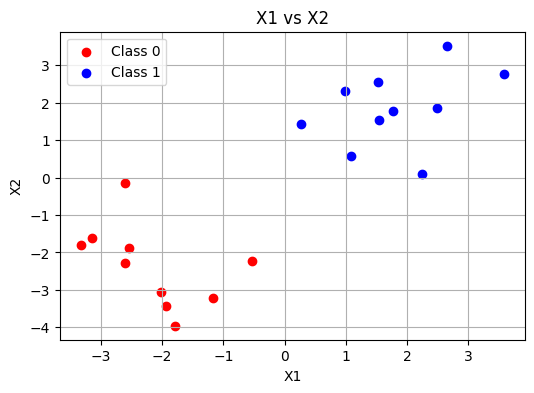

Iteration 1: weights = [ 0.9488177  -0.03785227 -0.18208361]
Iteration 2: weights = [ 1.0488177  -0.25460046 -0.41853044]
Iteration 3: weights = [ 1.0788177  -0.61678605 -0.81806868]
Iteration 4: weights = [ 1.0788177  -1.01506183 -1.23872821]
Iteration 5: weights = [ 1.0788177  -1.41333762 -1.65938773]
Iteration 6: weights = [ 1.0788177  -1.81161341 -2.08004725]
Iteration 7: weights = [ 1.0788177  -2.20988919 -2.50070678]
Iteration 8: weights = [ 1.0788177  -2.60816498 -2.9213663 ]
Iteration 9: weights = [ 1.0788177  -3.00644077 -3.34202583]
Iteration 10: weights = [ 1.0788177  -3.40471655 -3.76268535]
Iteration 11: weights = [ 1.0788177  -3.80299234 -4.18334487]
Iteration 12: weights = [ 1.0788177  -4.20126813 -4.6040044 ]
Iteration 13: weights = [ 1.0788177  -4.59954392 -5.02466392]
Iteration 14: weights = [ 1.0788177  -4.9978197  -5.44532344]
Iteration 15: weights = [ 1.0788177  -5.39609549 -5.86598297]
Iteration 16: weights = [ 1.0788177  -5.79437128 -6.28664249]
Iteration 17: wei

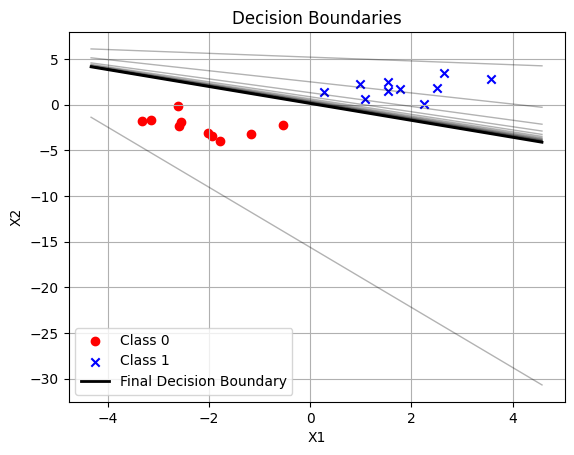

Iteration 1: weights = [ 0.92311034 -0.19063021 -0.02567619]
Iteration 2: weights = [ 1.02311034 -0.40737841 -0.26212302]
Iteration 3: weights = [ 1.04311034 -0.79198361 -0.66252845]
Iteration 4: weights = [ 1.04311034 -1.1902594  -1.08318798]
Iteration 5: weights = [ 1.04311034 -1.58853519 -1.5038475 ]
Iteration 6: weights = [ 1.04311034 -1.98681097 -1.92450703]
Iteration 7: weights = [ 1.04311034 -2.38508676 -2.34516655]
Iteration 8: weights = [ 1.04311034 -2.78336255 -2.76582607]
Iteration 9: weights = [ 1.04311034 -3.18163833 -3.1864856 ]
Iteration 10: weights = [ 1.04311034 -3.57991412 -3.60714512]
Iteration 11: weights = [ 1.04311034 -3.97818991 -4.02780465]
Iteration 12: weights = [ 1.04311034 -4.37646569 -4.44846417]
Iteration 13: weights = [ 1.04311034 -4.77474148 -4.86912369]
Iteration 14: weights = [ 1.04311034 -5.17301727 -5.28978322]
Iteration 15: weights = [ 1.04311034 -5.57129306 -5.71044274]
Iteration 16: weights = [ 1.04311034 -5.96956884 -6.13110226]
Iteration 17: wei

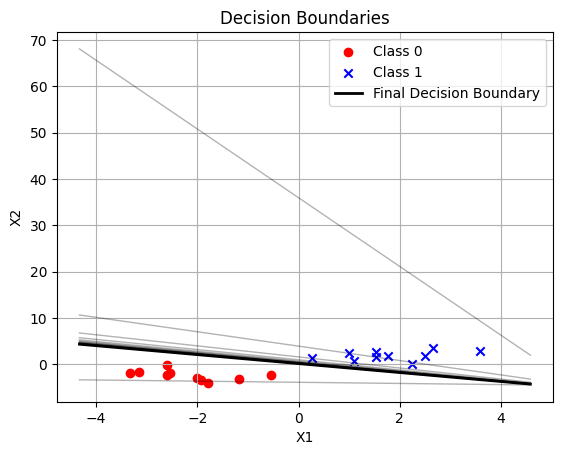

In [7]:
# Uploading the file
from google.colab import files
uploaded = files.upload()

# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading the CSV file
df = pd.read_csv("A4_P1.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Defining the step function
def step(z):
    return 1 if z >= 0 else 0

# Perceptron training function
def perceptron_train(X, y, lr=0.01, iterations=20, random_state=42):
    np.random.seed(random_state)
    weights = np.random.rand(X.shape[1])
    history = [weights.copy()]

    for j in range(iterations):
        for i in range(X.shape[0]):
            z = np.dot(weights, X[i])
            y_pred = step(z)
            if y[i] < y_pred:
                weights += lr * X[i]
            elif y[i] > y_pred:
                weights -= lr * X[i]
        history.append(weights.copy())
        print(f"Iteration {j+1}: weights = {weights}")

    return weights, history

# Plotting decision boundaries
def plot_all_decision_boundaries_same_plot(X, y, history):
    class0_x1 = X[y == 0][:, 1]
    class0_x2 = X[y == 0][:, 2]
    class1_x1 = X[y == 1][:, 1]
    class1_x2 = X[y == 1][:, 2]

    plt.scatter(class0_x1, class0_x2, color='red', marker='o', label='Class 0')
    plt.scatter(class1_x1, class1_x2, color='blue', marker='x', label='Class 1')

    x_vals = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, 100)

    for i in range(len(history)):
        w = history[i]
        x2_vals = []
        for x in x_vals:
            if w[2] != 0:
                x2 = -(w[0] + w[1]*x) / w[2]
            else:
                x2 = 0
            x2_vals.append(x2)

        if i == len(history) - 1:
            plt.plot(x_vals, x2_vals, color='black', linewidth=2, label="Final Decision Boundary")
        else:
            plt.plot(x_vals, x2_vals, color='black', linewidth=1, alpha=0.3)

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Decision Boundaries")
    plt.legend()
    plt.grid(True)
    plt.show()

# Adding bias to X
bias = np.ones((X.shape[0], 1))
X = np.hstack((bias, X))

# Initial scatter plot of X1 vs X2
class0_x1 = X[y == 0][:, 1]
class0_x2 = X[y == 0][:, 2]
class1_x1 = X[y == 1][:, 1]
class1_x2 = X[y == 1][:, 2]

plt.figure(figsize=(6, 4))
plt.scatter(class0_x1, class0_x2, color='red', label='Class 0')
plt.scatter(class1_x1, class1_x2, color='blue', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('X1 vs X2')
plt.grid(True)
plt.legend()
plt.show()

# Training and plotting for random_state = 15
weights, history = perceptron_train(X, y, lr=0.01, iterations=20, random_state=15)
plot_all_decision_boundaries_same_plot(X, y, history)

# Training and plotting for random_state = 52
weights2, history2 = perceptron_train(X, y, lr=0.01, iterations=20, random_state=52)
plot_all_decision_boundaries_same_plot(X, y, history2)

# **Question 8**

Epochs Training Loss       Test Loss        Training Accuracy       Test Accuracy
0:        0.308773,       0.329769,        0.341667,              0.366667
---------------------------------------------------------------------------
Epochs Training Loss       Test Loss        Training Accuracy       Test Accuracy
100:        0.014055,       0.011342,        0.966667,              1.000000
---------------------------------------------------------------------------
Epochs Training Loss       Test Loss        Training Accuracy       Test Accuracy
200:        0.011229,       0.007782,        0.983333,              1.000000
---------------------------------------------------------------------------
Epochs Training Loss       Test Loss        Training Accuracy       Test Accuracy
300:        0.010322,       0.005947,        0.983333,              1.000000
---------------------------------------------------------------------------
Epochs Training Loss       Test Loss        Training Accuracy 

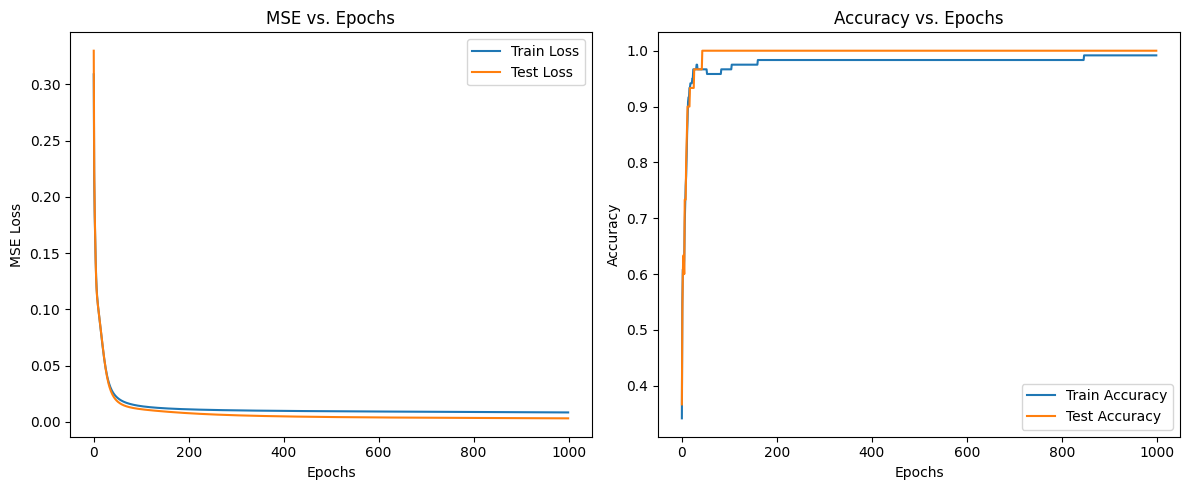

In [8]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Loading the Iris dataset
df = sklearn.datasets.load_iris()
X = df['data']
y = df['target']

# One-hot encoding the target variable
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(y.reshape(-1, 1))

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural network configuration
hidden_layer_neurons = 5
np.random.seed(42)
W1 = np.random.randn(X_train.shape[1], hidden_layer_neurons)
b1 = np.random.randn(hidden_layer_neurons)
W2 = np.random.randn(hidden_layer_neurons, Y_train.shape[1])
b2 = np.random.randn(Y_train.shape[1])

lr = 0.01
num_epochs = 1000

# Activation and loss functions
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1 - np.tanh(x)**2

def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def neural_forward(x, W1, b1, W2, b2):
    z1 = np.dot(x, W1) + b1
    a1 = tanh(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def compute_accuracy(predictions, targets):
    pred_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(targets, axis=1)
    return np.mean(pred_labels == true_labels)

# Training loop
train_losses = []
test_losses = []
train_acc = []
test_acc = []

n_train = X_train.shape[0]
n_test = X_test.shape[0]

for iter_num in range(num_epochs):
    order = np.arange(n_train)

    for idx in order:
        sample = X_train[idx]
        label = Y_train[idx]

        # Forward pass
        hidden_input, hidden_act, output_input, output_act = neural_forward(sample, W1, b1, W2, b2)

        # Backward pass
        softmax_jacobian = np.diag(output_act) - np.outer(output_act, output_act)
        delta_out = softmax_jacobian.dot(output_act - label)
        delta_hidden = dtanh(hidden_input) * (W2.dot(delta_out))

        grad_W2 = np.outer(hidden_act, delta_out)
        grad_b2 = delta_out
        grad_W1 = np.outer(sample, delta_hidden)
        grad_b1 = delta_hidden

        # Updating weights
        W2 -= lr * grad_W2
        b2 -= lr * grad_b2
        W1 -= lr * grad_W1
        b1 -= lr * grad_b1

    # Training metrics
    sum_train_loss = 0.0
    train_preds = []
    for j in range(n_train):
        _, _, _, out = neural_forward(X_train[j], W1, b1, W2, b2)
        sum_train_loss += mse_loss(out, Y_train[j])
        train_preds.append(out)
    sum_train_loss /= n_train
    train_preds = np.array(train_preds)
    train_accuracy = compute_accuracy(train_preds, Y_train)

    train_losses.append(sum_train_loss)
    train_acc.append(train_accuracy)

    # Test metrics
    sum_test_loss = 0.0
    test_preds = []
    for j in range(n_test):
        _, _, _, out = neural_forward(X_test[j], W1, b1, W2, b2)
        sum_test_loss += mse_loss(out, Y_test[j])
        test_preds.append(out)
    sum_test_loss /= n_test
    test_preds = np.array(test_preds)
    test_accuracy = compute_accuracy(test_preds, Y_test)

    test_losses.append(sum_test_loss)
    test_acc.append(test_accuracy)

    # Printing progress every 100 epochs
    if iter_num % 100 == 0:
        print("Epochs", "Training Loss      ", "Test Loss       ", "Training Accuracy      ", "Test Accuracy")
        print(f"{iter_num}:        {sum_train_loss:.6f},       {sum_test_loss:.6f},        {train_accuracy:.6f},              {test_accuracy:.6f}")
        print("---------------------------------------------------------------------------")

# Plotting
plt.figure(figsize=(12, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("MSE vs. Epochs")
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(test_acc, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epochs")
plt.legend()

plt.tight_layout()
plt.show()